In [1]:
# Import necessary modules
import csv
import glob
import json
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import pandas as pd
import sys

from matplotlib import rc
from nsrdb import data_download
from tabulate import tabulate

In [2]:
# Plotting settings
plt.rcParams['animation.embed_limit'] = 2**128
plt.rcParams.update({
    'text.usetex': True,
    'font.family': 'Computer Modern Roman',
})

In [8]:
# Key files and file paths
nsrdb_file_path = '../nsrdb/'
key_region_file = 'key_region_dict.json'
nsrdb_data_file_pattern = r'nsrdb_(.*?)_\d+\.csv'  

In [4]:
# Key region dictionary
with open(key_region_file, 'r') as json_file:
    key_region_dict = json.load(json_file)

API_KEY = 'cZmm6xKmZ08RHq8bk4vNnaFlXAqyj5mMrUUWteS6'
EMAIL = 'carlabecker@berkeley.edu'
BASE_URL = "https://developer.nrel.gov/api/nsrdb/v2/solar/psm3-2-2-tmy-download.json?"
POINTS = []
for key, value in key_region_dict.items():
    POINT = value['nsrdb_code']
    POINTS.append(POINT)

In [11]:
# Get radiation data from NSDRB
# Already done, but uncomment below to freshly retrieve the data
# data_download(API_KEY, EMAIL, BASE_URL, POINTS)

# Load the pre-downloaded CSV data 
sys.path.insert(1, nsrdb_file_path)

# Regular expression pattern to match the region names
compiled_nsrdb_data_file_pattern = re.compile(nsrdb_data_file_pattern)

# Use glob to list files matching the initial pattern
for file_path in glob.glob(os.path.join(nsrdb_file_path, '*')):
    
    filename = os.path.basename(file_path)
    
    # Use regex to check if the filename matches the pattern
    match = compiled_nsrdb_data_file_pattern.match(filename)
    if match:

        # If it matches, extract the state name and use it as a dictionary key
        state = match.group(1)
        
        # Add the data as an attribute to the state in the dictionary
        nsrdb_data = pd.read_csv(file_path, header='infer')
        key_region_dict[state]['nsrdb_data'] = nsrdb_data

In [17]:
print(key_region_dict['wyoming']['nsrdb_data'].columns)

Index(['Year', 'Month', 'Day', 'Hour', 'Minute', 'Temperature', 'Dew Point',
       'DHI', 'Surface Albedo', 'DNI', 'GHI'],
      dtype='object')


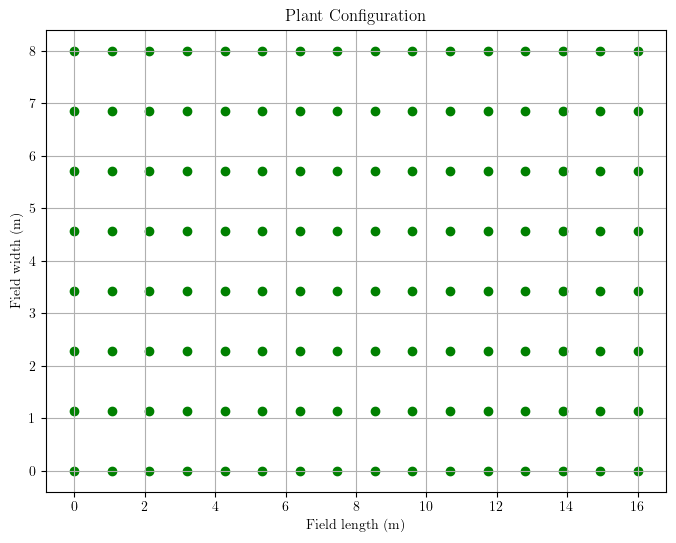

In [13]:
# Set the (x, y) coordinates of the plants
num_plants_x = 16
num_plants_y = 8

field_dim_x = 16
field_dim_y = 8

def generate_2d_plant_coordinates(num_plants_x, num_plants_y, field_dim_x, field_dim_y):

    # Calculate spacing between points
    spacing_x = field_dim_x / (num_plants_x - 1)
    spacing_y = field_dim_y / (num_plants_y - 1)
    
    # Generate coordinates
    coordinates = []
    for i in range(num_plants_x):
        x = i * spacing_x
        for j in range(num_plants_y):
            y = j * spacing_y
            coordinates.append((x, y))
    
    return coordinates

def plot_2d_plant_coordinates(coordinates):

    # Unpack the coordinates into separate x and y lists
    x_coords, y_coords = zip(*coordinates)
    
    # Create a plot
    plt.figure(figsize=(8, 6))
    plt.scatter(x_coords, y_coords, color='green')
    plt.xlabel('Field length (m)')
    plt.ylabel('Field width (m)')
    plt.title('Plant Configuration')
    plt.grid(True)
    plt.show()

coordinates = generate_2d_plant_coordinates(num_plants_x, num_plants_y, field_dim_x, field_dim_y)
plot_2d_plant_coordinates(coordinates)

In [ ]:
# Azimuthal Angle Guide
# North = 0     azimuth
# East  = pi/2  azimuth
# South = pi    azimuth
# West  = 3pi/2 azimuth

# Variable Glossary - Farm Location
sunrise_time = 7  # hour of day that sun rises, [unitless]
sunset_time  = 18 # hour of day that sun sets,  [unitless]
rad_azim_angle = np.pi/4 # azimuthal angle at which radiation hits farm in x-y plane, [rad]
rad_zenith_angle = np.pi/4 # zenith angle at which radiation hits leaves w.r.t. stem (z-axis), [rad]
initial_rad = 

# Material 1 property search bounds
# (targeting silicon carbide: k = 213 GPa, mu = 187 GPa, sigE = 4.35e-4, K = 325 W/m/K)
k1min    = 100  # Lower bound for Phase 2 bulk modulus,     [GPa]
k1max    = 300  # Upper bound for Phase 2 bulk modulus,     [GPa]
mu1min   = 100  # Lower bound for Phase 2 shear modulus,    [GPa]
mu1max   = 300  # Upper bound for Phase 2 shear modulus,    [GPa]
K1min    = 100  # Lower bound for Phase 2 thermal cond.,    [W/m/K]
K1max    = 400  # Upper bound for Phase 2 thermal cond.,    [W/m/K]
sig1Emin = 1e4 # Lower bound for Phase 2 electrical cond., [S/m]
sig1Emax = 1e7 # Upper bound for Phase 2 electrical cond., [S/m]

# Material 2 property search bounds
# (targeting aluminum: k = 76 GPa, mu = 26 GPa, sigE = 37.7e6, K = 237 W/m/K)
k2min    = 50   # Lower bound for Phase 1 bulk modulus,     [GPa]
k2max    = 300   # Upper bound for Phase 1 bulk modulus,     [GPa]
mu2min   = 50   # Lower bound for Phase 1 shear modulus,    [GPa]
mu2max   = 300   # Upper bound for Phase 1 shear modulus,    [GPa]
K2min    = 100  # Lower bound for Phase 1 thermal cond.,    [W/m/K]
K2max    = 400  # Upper bound for Phase 1 thermal cond.,    [W/m/K]
sig2Emin = 1e4 # Lower bound for Phase 1 electrical cond., [S/m]
sig2Emax = 1e7 # Upper bound for Phase 1 electrical cond., [S/m]

In [ ]:
## Program-specified Parameters

# Genetic algorithm parameters
P = 10   # number of design strings to breed
K = 10   # number of offspring design strings 
G = 5000 # maximum number of generations
S = 200  # total number of design strings per generation
dv = 10  # number of design variables per string

# Shared properties between materials 1 and 2
v1min = 0 # Lower bound for volume fraction,       []
v1max = 1 # Upper bound for volume fraction,       []
gmin  = 0 # Lower bound for HS averaging constant, []
gmax  = 1 # Upper bound for HS averaging constant, []

# Concentration factor tolerances
TOL_k = 0.5   # Bulk modulus tolerance,  []
TOL_mu = 0.5  # Shear modulus tolerance, []
TOL_K = 0.5   # Thermal tolerance,       []
TOL_sig = 0.8 # Electrical tolerance,    []

# Given Cost Function Weights
W1 = 1/3 # Electrical weight,            []
W2 = 1/3 # Thermal weight,               []
W3 = 1/3 # Mechanical weight,            []
w1 = 1   # Material property weights,    []
wj = 0.5 # Concentration tensor weights, []

# Assemble Search Bound Vectors
lower_bounds = np.array([k1min, mu1min, sig1Emin, K1min, k2min, mu2min, sig2Emin, K2min, v1min, gmin])
upper_bounds = np.array([k1max, mu1max, sig1Emax, K1max, k2max, mu2max, sig2Emax, K2max, v1max, gmax])

In [ ]:
## Genetic Algorithm Helper Functions

def sort(pi):
    new_pi = np.sort(pi, axis=0)
    ind = np.argsort(pi, axis=0)
    return [new_pi, ind]

def reorder(Lambda, ind):
    temp = np.zeros((S,dv))
    for i in range(0, len(ind)):
        temp[i,:] = Lambda[int(ind[i]),:]
    Lambda = temp
    return Lambda

def get_unique_designs(Lambda, costs):

    # Costs are often equal to >10 decimal points
    # Truncate to obtain a richer set of suggestions
    new_costs = np.round(costs, decimals=3)
    
    # Obtain Unique Strings and Costs
    [unique_costs, iuniq] = np.unique(new_costs, return_index=True)
    unique_strings = Lambda[iuniq]

    return [unique_strings, unique_costs] 


In [ ]:
## Cost Function Definition

# An anonymous function for evaluating fitness
def Pi(Lambda):

    # Extract design parameters from genetic string
    k1, mu1, sig1E, K1, k2, mu2, sig2E, K2, v1, gamma = [float(elem) for elem in Lambda]
    v2 = 1 - v1  

    ## Min and Max Effective Property Bounds
    # Bounds on electrical conductivity
    sigE_min = sig1E + v2 / (1/(sig2E - sig1E) + v1/(3*sig1E))
    sigE_max = sig2E + v1 / (1/(sig1E - sig2E) + v2/(3*sig2E))
    
    # Bounds on thermal conducitivity
    K_min = K1 + v2 / (1/(K2 - K1) + v1/(3*K1))
    K_max = K2 + v1 / (1/(K1 - K2) + v2/(3*K2))
    
    # Bounds on bulk modulus
    k_min = k1 + v2 / (1/(k2 -k1) + 3*v1/(3*k1 + 4*mu1))
    k_max = k2 + v1 / (1/(k1 -k2) + 3*v2/(3*k2 + 4*mu2))
    
    # Bounds on shear modulus
    mu_min = mu1 + v2 / (1/(mu2 - mu1) + 6*v1*(k1 + 2*mu1) / (5*mu1*(3*k1 + 4*mu1)))
    mu_max = mu2 + v1 / (1/(mu1 - mu2) + 6*v2*(k2 + 2*mu2) / (5*mu2*(3*k2 + 4*mu2)))
    
    ## Effective Material Properties
    sigE_eff = gamma * sigE_max + (1 - gamma) * sigE_min
    K_eff    = gamma * K_max    + (1 - gamma) * K_min
    k_eff    = gamma * k_max    + (1 - gamma) * k_min
    mu_eff   = gamma * mu_max   + (1 - gamma) * mu_min
    
    ## Concentration Tensor Determination
    # Electrical Load Sharing
    CJ1CE1 = sig1E/sigE_eff * (1/v1 * (sig2E - sigE_eff)/(sig2E - sig1E))**2
    CJ2CE2 = sig2E/sigE_eff * (1/v2 * (sig1E - sigE_eff)/(sig1E - sig2E))**2
    
    # Thermal Load Sharing
    Ct2 = 1/v2 * (K_eff - K1) / (K2 - K1) 
    Ct1 = 1/v1 * (1 - v2 * Ct2) 
    Cq2 = K2 * Ct2 * 1/K_eff
    Cq1 = 1/v1 * (1 - v2 * Cq2)
        
    # Mechanical Load Sharing
    Ck2  = 1/v2 * k2/k_eff   * (k_eff - k1) / (k2 - k1)
    Cmu2 = 1/v2 * mu2/mu_eff * (mu_eff - mu1)/(mu2 - mu1)
    Ck1  = 1/v1 * (1 - v2 * Ck2)
    Cmu1 = 1/v1 * (1 - v2 * Cmu2)
    
    ## Cost Function Weight Determination
    # Assign concentration tensor weights
    w2E = wj
    w3E = wj
    w2T = wj
    w3T = wj
    w3M = wj
    w4M = wj
    w5M = wj
    w6M = wj
    
    # Electrical weights
    if (CJ1CE1 - TOL_sig) / TOL_sig > 0:
        w2E_hat = w2E
    else:
        w2E_hat = 0

    if (CJ2CE2 - TOL_sig) / TOL_sig > 0:
        w3E_hat = w3E
    else:
        w3E_hat = 0
    
    # Thermal weights
    if (Cq1 - TOL_K) / TOL_K > 0:
        w2T_hat = w2T
    else:
        w2T_hat = 0

    if (Cq2 - TOL_K) / TOL_K > 0:
        w3T_hat = w3T
    else:
        w3T_hat = 0
    
    # Mechanical weights
    if (Ck2 - TOL_k) > 0:
        w3M_hat = w3M
    else:
        w3M_hat = 0

    if (Cmu2 - TOL_mu) > 0:
        w4M_hat = w4M
    else:
        w4M_hat = 0

    if (Ck1 - TOL_k) > 0:
        w5M_hat = w5M
    else:
        w5M_hat = 0

    if (Cmu1 - TOL_mu) > 0:
        w6M_hat = w6M
    else:
        w6M_hat = 0

    ## Cost Functions
    # Electrical Property Cost Function
    Pi_elec = w1      * abs((sigE_effD - sigE_eff) / sigE_effD) \
            + w2E_hat * abs((CJ1CE1   - TOL_sig)   / TOL_sig) \
            + w3E_hat * abs((CJ2CE2   - TOL_sig)   / TOL_sig)

    # Thermal Property Cost Function    
    Pi_thermo = w1      * abs((K_effD - K_eff) / K_effD) \
              + w2T_hat * abs((Cq1    - TOL_K) / TOL_K) \
              + w3T_hat * abs((Cq2    - TOL_K) / TOL_K)
        
    # Mechanical Property Cost Function
    Pi_mech = w1      * abs((k_effD  - k_eff) / k_effD) \
            + w1      * abs((mu_effD - mu_eff)/ mu_effD) \
            + w3M_hat * abs((Ck2     - TOL_k) / TOL_k) \
            + w4M_hat * abs((Cmu2    - TOL_mu)/ TOL_mu) \
            + w5M_hat * abs((Ck1     - TOL_k) / TOL_k) \
            + w6M_hat * abs((Cmu1    - TOL_mu)/ TOL_mu)

    # Multi-property (Combined) Cost Function
    cost = W1 * Pi_elec + W2 * Pi_thermo + W3 * Pi_mech

    return cost

In [ ]:
## Material Property Optimization, CASE A 
# - Keep the top P=10 parents after each generation
# - Produce 10 offspring
# - Generate 180 new random strings

def caseA():
    
    # Initialize arrays to store the cost and original indices of each generation
    PI = np.ones((G, S))
    Orig = np.ones((G, S))
    
    # Initialize arrays to store best performer and parent avg 
    Pi_min = np.zeros(G)     # best cost
    Pi_par_avg = np.zeros(G) # avg cost of parents
    
    # Generation counter
    g = 0

    # Initialize array to store costs for current generation
    cost = np.zeros(S)

    # Randomly populate first generation  
    Lambda = np.ones((S, dv))
    for i in range (S):
        Lambda[i, :] = np.random.uniform(lower_bounds, upper_bounds)
        cost[i] = Pi(Lambda[i, :])
            
    # Sort the costs of the first generation
    [new_cost, ind] = sort(cost)  
    PI[g, :] = new_cost.reshape(1,S) 
    
    # Store the cost of the best performer and average cost of the parents 
    Pi_min[g] = np.min(new_cost)
    Pi_par_avg[g] = np.mean(new_cost[0:P])
    
    # Update Lambda based on sorted indices
    Lambda = reorder(Lambda, ind)
    Orig[g,:] = ind.reshape(1,S) 
    
    # Perform all later generations    
    while g < G:
        
        print(g)
        cost[0:P] = new_cost[0:P] # retain the parents from the previous generation
        
        # Select top parents P from Lambda to be breeders
        for p in range(0, P, 2):
            phi1, phi2 = np.random.rand(2)
            kid1 = phi1*Lambda[p, :] + (1-phi1)*Lambda[p+1, :]
            kid2 = phi2*Lambda[p, :] + (1-phi2)*Lambda[p+1, :]
            
            # Append offspring to Lambda 
            Lambda[P+p,   :] = kid1
            Lambda[P+p+1, :] = kid2
        
            # Evaluate Offspring
            cost[P+p]   = Pi(Lambda[P+p, :])
            cost[P+p+1] = Pi(Lambda[P+p+1, :])
                     
        # Randomly generate new design strings to fill th rest of the population
        for i in range(S-P-K):
            Lambda[P+K+i, :] = np.random.uniform(lower_bounds, upper_bounds)
            cost[P+K+i] = Pi(Lambda[P+K+i, :])

        # Sort the costs for the gth generation
        [new_cost, ind] = sort(cost)  
        PI[g, :] = new_cost.reshape(1,S) 
    
        # Store the cost of the best performer and average cost of the parents 
        Pi_min[g] = np.min(new_cost)
        Pi_par_avg[g] = np.mean(new_cost[0:P])
    
        # Update Lambda based on sorted indices
        Lambda = reorder(Lambda, ind)
        Orig[g,:] = ind.reshape(1,S)  

        # Update the generation counter
        g = g + 1          
    
    return PI, Lambda, Orig, Pi_min, Pi_par_avg         


In [ ]:
# Call the Genetic Algorithm for Case A  
PI, Lambda, Orig, Pi_min, Pi_par_avg = caseA() # Keep the top P=10 parents after each generation
                                               # Produce 10 offspring
                                               # Generate 180 new random strings

In [ ]:
# Print Expected Results
# Molybdenum: k = 263 GPa, mu = 119 GPa, sigE = 18e6, K = 138 W/m/K
# Aluminum: k = 76 GPa, mu = 26 GPa, sigE = 37.7e6, K = 237 W/m/K
Mo = np.array([263, 119, 18e6, 128])
Al = np.array([76, 26, 37.7e6, 237])
headers = ['k', 'mu', 'sigE', 'K']
table_data = np.vstack((Mo, Al))
print('MOLYBDENUM AND ALUMINUM MATERIAL PROPERTIES')
print(tabulate(table_data, headers=headers))

# Reveal Best Designs
[unique_strings, unique_costs] = get_unique_designs(Lambda, PI[-1,:])
headers = ['k1', 'mu1', 'sig1E', 'K1', 'k2', 'mu2', 'sig2E', 'K2', 'v1', 'gamma', 'Cost']
table_data = np.hstack((unique_strings[0:20,:], unique_costs[0:20].reshape(-1,1)))
print('\nHASHIN-SHTRIKMAN + GENETIC ALGORITHM RECOMMENDED MATERIAL PROPERTIES')
print(tabulate(table_data, headers=headers))

# Plotting
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(G), Pi_par_avg, label='top 10 avg')
ax.plot(range(G), Pi_min, label="best ")
plt.xlabel('Generation', fontsize= 20)
plt.ylabel('Cost', fontsize=20)
plt.title('Genetic Algorithm Results, Case A', fontsize = 24)
plt.legend(fontsize = 14)
plt.show()

In [ ]:
## (Material 1) Filter the dictionary extracted from MP-API based on GA results
mat_1_dict = {"mp-ids": [],
              "mp-ids-contrib": [], 
              "formula": [],
              "metal": [],
              "bulk_modulus": [],
              "shear_modulus": [],
              "therm_cond_300K_low_doping": [],
              "elec_cond_300K_low_doping": []}

bulk_mod_lower_bound = min(table_data[:,0])
bulk_mod_upper_bound = max(table_data[:,0])
shear_mod_lower_bound = min(table_data[:,1])
shear_mod_upper_bound = max(table_data[:,1])
elec_cond_lower_bound = min(table_data[:,2])
elec_cond_upper_bound = max(table_data[:,2])
therm_cond_lower_bound = min(table_data[:,3])
therm_cond_upper_bound = max(table_data[:,3])

# Get materials that satisfy the bulk modulus constraints for material 1
mat_1_bulk_idx = []
for i, bulk_mod in enumerate(final_dict["bulk_modulus"]):
    if (bulk_mod >= bulk_mod_lower_bound) and (bulk_mod <= bulk_mod_upper_bound):       
        mat_1_bulk_idx.append(i)
print(mat_1_bulk_idx)

# Get materials that satisfy the shear modulus constraints for material 1
mat_1_shear_idx = []
for i, shear_mod in enumerate(final_dict["shear_modulus"]):
    if (shear_mod >= shear_mod_lower_bound) and (shear_mod <= shear_mod_upper_bound): 
        mat_1_shear_idx.append(i) 
print(mat_1_shear_idx)

# Get materials that satisfy the room temp, low doping electrical conductivity constraints for material 1
mat_1_elec_idx = []
for i, elec_cond in enumerate(final_dict["elec_cond_300K_low_doping"]):
    if (elec_cond >= elec_cond_lower_bound) and (elec_cond <= elec_cond_upper_bound):  
        mat_1_elec_idx.append(i)
print(mat_1_elec_idx)

# Get materials that satisfy the room temp, low doping electrical conductivity constraints for material 1
mat_1_therm_idx = []      
for i, therm_cond in enumerate(final_dict["therm_cond_300K_low_doping"]):
    if (therm_cond >= therm_cond_lower_bound) and (therm_cond <= elec_cond_upper_bound):  
        mat_1_therm_idx.append(i)
print(mat_1_therm_idx)

mat_1_indices = list(set(mat_1_bulk_idx) & set(mat_1_shear_idx) & set(mat_1_elec_idx) & set(mat_1_therm_idx))
print(mat_1_indices)

# Options for material 1
# TODO return mp-ids from mat_1_indices


In [ ]:
## (Material 2) Filter the dictionary extracted from MP-API based on GA results
mat_2_dict = {"mp-ids": [],
              "mp-ids-contrib": [], 
              "formula": [],
              "metal": [],
              "bulk_modulus": [],
              "shear_modulus": [],
              "therm_cond_300K_low_doping": [],
              "elec_cond_300K_low_doping": []}

bulk_mod_lower_bound = min(table_data[:,4])
bulk_mod_upper_bound = max(table_data[:,4])
shear_mod_lower_bound = min(table_data[:,5])
shear_mod_upper_bound = max(table_data[:,5])
elec_cond_lower_bound = min(table_data[:,6])
elec_cond_upper_bound = max(table_data[:,6])
therm_cond_lower_bound = min(table_data[:,7])
therm_cond_upper_bound = max(table_data[:,7])

# Get materials that satisfy the bulk modulus constraints for material 2
mat_2_bulk_idx = []
for i, bulk_mod in enumerate(final_dict["bulk_modulus"]):
    if (bulk_mod >= bulk_mod_lower_bound) and (bulk_mod <= bulk_mod_upper_bound):       
        mat_2_bulk_idx.append(i)
print(mat_2_bulk_idx)

# Get materials that satisfy the shear modulus constraints for material 2
mat_2_shear_idx = []
for i, shear_mod in enumerate(final_dict["shear_modulus"]):
    if (shear_mod >= shear_mod_lower_bound) and (shear_mod <= shear_mod_upper_bound): 
        mat_2_shear_idx.append(i) 
print(mat_2_shear_idx)

# Get materials that satisfy the room temp, low doping electrical conductivity constraints for material 2
mat_2_elec_idx = []
for i, elec_cond in enumerate(final_dict["elec_cond_300K_low_doping"]):
    if (elec_cond >= elec_cond_lower_bound) and (elec_cond <= elec_cond_upper_bound):  
        mat_2_elec_idx.append(i)
print(mat_2_elec_idx)

# Get materials that satisfy the room temp, low doping electrical conductivity constraints for material 2
mat_2_therm_idx = []      
for i, therm_cond in enumerate(final_dict["therm_cond_300K_low_doping"]):
    if (therm_cond >= therm_cond_lower_bound) and (therm_cond <= elec_cond_upper_bound):  
        mat_2_therm_idx.append(i)
print(mat_2_therm_idx)

mat_2_indices = list(set(mat_2_bulk_idx) & set(mat_2_shear_idx) & set(mat_2_elec_idx) & set(mat_2_therm_idx))
print(mat_2_indices)

In [ ]:
## Material Property Optimization, CASE B
# - Do NOT keep top P=10 parents after each generation
# - Produce 10 offspring
# - Generate 190 new random strings

def caseB():
    
    # Initialize arrays to store the cost and original indices of each generation
    PI = np.ones((G, S))
    Orig = np.ones((G, S))
    
    # Initialize arrays to store best performer and parent avg 
    Pi_min = np.zeros(G)     # best cost
    Pi_par_avg = np.zeros(G) # avg cost of parents
    
    # Generation counter
    g = 0

    # Initialize array to store costs for current generation
    cost = np.zeros(S)

    # Randomly populate first generation  
    Lambda = np.ones((S, dv))
    for i in range (S):
        Lambda[i, :] = np.random.uniform(lower_bounds, upper_bounds)
        cost[i] = Pi(Lambda[i, :])
            
    # Sort the costs of the first generation
    [new_cost, ind] = sort(cost)  
    PI[g, :] = new_cost.reshape(1,S) 
    
    # Store the cost of the best performer and average cost of the parents 
    Pi_min[g] = np.min(new_cost)
    Pi_par_avg[g] = np.mean(new_cost[0:P])
    
    # Update Lambda based on sorted indices
    Lambda = reorder(Lambda, ind)
    Orig[g,:] = ind.reshape(1,S) 
    
    # Perform all later generations    
    while g < G:
        
        print(g)
        cost = np.zeros(S) # do NOTretain the parents from the previous generation
        
        # Select top parents P from Lambda to be breeders
        for p in range(0, P, 2):
            phi1, phi2 = np.random.rand(2)
            kid1 = phi1*Lambda[p, :] + (1-phi1)*Lambda[p+1, :]
            kid2 = phi2*Lambda[p, :] + (1-phi2)*Lambda[p+1, :]
            
            # Append offspring to Lambda 
            Lambda[p,   :] = kid1
            Lambda[p+1, :] = kid2
        
            # Evaluate Offspring
            cost[p]   = Pi(Lambda[p, :])
            cost[p+1] = Pi(Lambda[p+1, :])
                     
        # Randomly generate new design strings to fill th rest of the population
        for i in range(S-K):
            Lambda[K+i, :] = np.random.uniform(lower_bounds, upper_bounds)
            cost[K+i] = Pi(Lambda[K+i, :])

        # Sort the costs for the gth generation
        [new_cost, ind] = sort(cost)  
        PI[g, :] = new_cost.reshape(1,S) 
    
        # Store the cost of the best performer and average cost of the parents 
        Pi_min[g] = np.min(new_cost)
        Pi_par_avg[g] = np.mean(new_cost[0:P])
    
        # Update Lambda based on sorted indices
        Lambda = reorder(Lambda, ind)
        Orig[g,:] = ind.reshape(1,S)  

        # Update the generation counter
        g = g + 1          
    
    return PI, Lambda, Orig, Pi_min, Pi_par_avg   


In [ ]:
# Call the Genetic Algorithm for Case B  
PI, Lambda, Orig, Pi_min, Pi_par_avg = caseB() # Do NOT keep the top P=10 parents after each generation
                                               # Produce 10 offspring
                                               # Generate 190 new random strings

In [ ]:
# Print Expected Results
# Silicon Carbide: k = 213 GPa, mu = 187 GPa, sigE = 4.35e-4, K = 325 W/m/K
# Aluminum: k = 76 GPa, mu = 26 GPa, sigE = 37.7e6, K = 237 W/m/K
# Typical volume fractions are 3-18% SiC in Al
SiC = np.array([213, 187, 4.35e-4, 325])
Al = np.array([76, 26, 37.7e6, 237])
headers = ['k', 'mu', 'sigE', 'K']
table_data = np.vstack((SiC, Al))
print('SILICON CARBIDE AND ALUMINUM MATERIAL PROPERTIES')
print(tabulate(table_data, headers=headers))

# Reveal Best Designs
[unique_strings, unique_costs] = get_unique_designs(Lambda, PI[-1,:])
headers = ['k1', 'mu1', 'sig1E', 'K1', 'k2', 'mu2', 'sig2E', 'K2', 'v1', 'gamma', 'Cost']
table_data = np.hstack((unique_strings[0:20,:], unique_costs[0:20].reshape(-1,1)))
print(tabulate(table_data, headers=headers))

# Plotting
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(G), Pi_par_avg, label='top 10 avg')
ax.plot(range(G), Pi_min, label="best ")
plt.xlabel('Generation', fontsize= 20)
plt.ylabel('Cost', fontsize=20)
plt.title('Genetic Algorithm Results, Case B', fontsize = 24)
plt.legend(fontsize = 14)
plt.show()

In [ ]:
## Material Property Optimization, CASE C
# - Keep top P=10 parents after each generation
# - Produce 10 offspring with mutations
# - Generate 180 new random strings using random weights [-1/2, 3/2] instead of [0, 1]
# - This allows for offspring to be generated outside of the hyperrectangle defined by th search bounds

a = -1/2
b =  3/2

def caseC():
    
    # Initialize arrays to store the cost and original indices of each generation
    PI = np.ones((G, S))
    Orig = np.ones((G, S))
    
    # Initialize arrays to store best performer and parent avg 
    Pi_min = np.zeros(G)     # best cost
    Pi_par_avg = np.zeros(G) # avg cost of parents
    
    # Generation counter
    g = 0

    # Initialize array to store costs for current generation
    cost = np.zeros(S)

    # Randomly populate first generation  
    Lambda = np.ones((S, dv))
    for i in range (S):
        Lambda[i, :] = np.random.uniform(lower_bounds, upper_bounds)
        cost[i] = Pi(Lambda[i, :])
            
    # Sort the costs of the first generation
    [new_cost, ind] = sort(cost)  
    PI[g, :] = new_cost.reshape(1,S) 
    
    # Store the cost of the best performer and average cost of the parents 
    Pi_min[g] = np.min(new_cost)
    Pi_par_avg[g] = np.mean(new_cost[0:P])
    
    # Update Lambda based on sorted indices
    Lambda = reorder(Lambda, ind)
    Orig[g,:] = ind.reshape(1,S) 
    
    # Perform all later generations    
    while g < G:
        
        print(g)
        cost = np.zeros(S) # do NOTretain the parents from the previous generation
        
        # Select top parents P from Lambda to be breeders
        for p in range(0, P, 2):
            phi1 = np.random.uniform(a,b)
            phi2 = np.random.uniform(a,b)
            kid1 = phi1*Lambda[p, :] + (1-phi1)*Lambda[p+1, :]
            kid2 = phi2*Lambda[p, :] + (1-phi2)*Lambda[p+1, :]
            
            # Append offspring to Lambda 
            Lambda[p,   :] = kid1
            Lambda[p+1, :] = kid2
        
            # Evaluate Offspring
            cost[p]   = Pi(Lambda[p, :])
            cost[p+1] = Pi(Lambda[p+1, :])
                     
        # Randomly generate new design strings to fill th rest of the population
        for i in range(S-K):
            Lambda[K+i, :] = np.random.uniform(lower_bounds, upper_bounds)
            cost[K+i] = Pi(Lambda[K+i, :])

        # Sort the costs for the gth generation
        [new_cost, ind] = sort(cost)  
        PI[g, :] = new_cost.reshape(1,S) 
    
        # Store the cost of the best performer and average cost of the parents 
        Pi_min[g] = np.min(new_cost)
        Pi_par_avg[g] = np.mean(new_cost[0:P])
    
        # Update Lambda based on sorted indices
        Lambda = reorder(Lambda, ind)
        Orig[g,:] = ind.reshape(1,S)  

        # Update the generation counter
        g = g + 1          
    
    return PI, Lambda, Orig, Pi_min, Pi_par_avg   


In [ ]:
# Call the Genetic Algorithm for Case C  
PI, Lambda, Orig, Pi_min, Pi_par_avg = caseC() # Keep top P=10 parents after each generation
                                               # Produce 10 offspring with mutations
                                               # Generate 180 new random strings using random weights [-1/2, 3/2] instead of [0, 1]
                                               # This allows for offspring to be generated outside of the hyperrectangle defined by th search bounds

In [ ]:
# Print Expected Results
# Silicon Carbide: k = 213 GPa, mu = 187 GPa, sigE = 4.35e-4, K = 325 W/m/K
# Aluminum: k = 76 GPa, mu = 26 GPa, sigE = 37.7e6, K = 237 W/m/K
# Typical volume fractions are 3-18% SiC in Al
SiC = np.array([213, 187, 4.35e-4, 325])
Al = np.array([76, 26, 37.7e6, 237])
headers = ['k', 'mu', 'sigE', 'K']
table_data = np.vstack((SiC, Al))
print('SILICON CARBIDE AND ALUMINUM MATERIAL PROPERTIES')
print(tabulate(table_data, headers=headers))

# Reveal Best Designs
[unique_strings, unique_costs] = get_unique_designs(Lambda, PI[-1,:])
headers = ['k1', 'mu1', 'sig1E', 'K1', 'k2', 'mu2', 'sig2E', 'K2', 'v1', 'gamma', 'Cost']
table_data = np.hstack((unique_strings[0:20,:], unique_costs[0:20].reshape(-1,1)))
print(tabulate(table_data, headers=headers))

# Plotting
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(G), Pi_par_avg, label='top 10 avg')
ax.plot(range(G), Pi_min, label="best ")
plt.xlabel('Generation', fontsize= 20)
plt.ylabel('Cost', fontsize=20)
plt.title('Genetic Algorithm Results, Case C', fontsize = 24)
plt.legend(fontsize = 14)
plt.show()

In [ ]:
print(np.random.uniform(-1,1))
print(np.random.uniform(-1,1))
print(np.random.uniform(-1,1))
print(np.random.uniform(-1,1))